In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [27]:
medals = pd.read_csv("./datasets/Summer Olympic medallists 1896 to 2008 - ALL MEDALISTS.tsv", sep = '\t', skiprows=4)
medals.columns = [x.lower() for x in medals.columns]

In [28]:
medals.head()

,city,edition,sport,discipline,athlete,noc,gender,event,event_gender,medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [29]:
country_names=medals['noc']

In [30]:
medal_counts=country_names.value_counts()
medal_counts

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
       ... 
ISV       1
AFG       1
TGA       1
CIV       1
AHO       1
Name: noc, Length: 138, dtype: int64

In [36]:
counted = medals.pivot_table(index='noc', values='athlete',columns='medal', aggfunc='count')
counted

medal,Bronze,Gold,Silver
noc,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [39]:
counted['totals'] = counted.sum(axis = 'columns')
counted

medal,Bronze,Gold,Silver,totals
noc,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0
...,...,...,...,...
VIE,NaN,NaN,2.0,2.0
YUG,118.0,143.0,174.0,435.0
ZAM,1.0,NaN,1.0,2.0


In [40]:
counted.sort_values('totals', ascending=False)

medal,Bronze,Gold,Silver,totals
noc,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
...,...,...,...,...
MRI,1.0,NaN,NaN,1.0
NIG,1.0,NaN,NaN,1.0
TGA,NaN,NaN,1.0,1.0


# idxmax() Method

In [43]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [54]:
weather = pd.read_csv("./datasets/waether_data.csv",header = None, parse_dates=True)
weather

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,13904,20111231,1953,12,CLR,,10.00,,,,...,,,30.03,,AA,,,,30.02,
10333,13904,20111231,2053,12,CLR,,10.00,,,,...,026,,30.05,,AA,,,,30.05,
10334,13904,20111231,2153,12,CLR,,10.00,,,,...,,,30.06,,AA,,,,30.06,
10335,13904,20111231,2253,12,CLR,,10.00,,,,...,,,30.09,,AA,,,,30.09,


In [55]:
weather.columns =  column_labels.split(',')

In [56]:
weather

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,13904,20111231,1953,12,CLR,,10.00,,,,...,,,30.03,,AA,,,,30.02,
10333,13904,20111231,2053,12,CLR,,10.00,,,,...,026,,30.05,,AA,,,,30.05,
10334,13904,20111231,2153,12,CLR,,10.00,,,,...,,,30.06,,AA,,,,30.06,
10335,13904,20111231,2253,12,CLR,,10.00,,,,...,,,30.09,,AA,,,,30.09,


In [65]:
medals.head()

,city,edition,sport,discipline,athlete,noc,gender,event,event_gender,medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [59]:
country_grouped=medals.groupby('noc')

In [75]:
Nsports=country_grouped['sport'].nunique()

In [76]:
Nsports=Nsports.sort_values(ascending=False)

In [78]:
Nsports.head(15)

noc
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: sport, dtype: int64

In [80]:
medals.head()

,city,edition,sport,discipline,athlete,noc,gender,event,event_gender,medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [81]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
city            29216 non-null object
edition         29216 non-null int64
sport           29216 non-null object
discipline      29216 non-null object
athlete         29216 non-null object
noc             29216 non-null object
gender          29216 non-null object
event           29216 non-null object
event_gender    29216 non-null object
medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [84]:
during_cold_war=(medals['edition'] >= 1952) & (medals['edition'] <= 1988)

In [88]:
is_usa_urs = medals['noc'].isin(['USA', 'URS']) 

In [90]:
is_usa_urs

0        False
1        False
2        False
3        False
4        False
         ...  
29211    False
29212    False
29213    False
29214    False
29215    False
Name: noc, Length: 29216, dtype: bool

In [92]:
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

In [93]:
cold_war_medals.head()

,city,edition,sport,discipline,athlete,noc,gender,event,event_gender,medal
8019,Helsinki,1952,Aquatics,Diving,"LEE, Samuel",USA,Men,10m platform,M,Gold
8021,Helsinki,1952,Aquatics,Diving,"STOVER-IRWIN, Juno Roslays",USA,Women,10m platform,W,Bronze
8022,Helsinki,1952,Aquatics,Diving,"MCCORMICK, Patricia",USA,Women,10m platform,W,Gold
8023,Helsinki,1952,Aquatics,Diving,"MYERS-POPE, Paula Jean",USA,Women,10m platform,W,Silver
8024,Helsinki,1952,Aquatics,Diving,"CLOTWORTHY, Robert Lynn",USA,Men,3m springboard,M,Bronze


In [94]:
cold_war_medals.tail()

,city,edition,sport,discipline,athlete,noc,gender,event,event_gender,medal
19583,Seoul,1988,Wrestling,Wrestling Gre-R,"DJULFALAKIAN, Levon",URS,Men,62 - 68kg (lightweight),M,Gold
19587,Seoul,1988,Wrestling,Wrestling Gre-R,"TURLYKHANOV, Daulet",URS,Men,68 - 74kg (welterweight),M,Silver
19589,Seoul,1988,Wrestling,Wrestling Gre-R,"MAMIASHVILI, Mikhail",URS,Men,74 - 82kg (middleweight),M,Gold
19591,Seoul,1988,Wrestling,Wrestling Gre-R,"POPOV, Vladimir",URS,Men,82 - 90kg (light-heavyweight),M,Bronze
19594,Seoul,1988,Wrestling,Wrestling Gre-R,"KOSLOWSKI, Dennis Marvin",USA,Men,90 - 100kg (heavyweight),M,Bronze


In [99]:
Nsports=cold_war_medals.groupby('noc')['sport'].nunique()
print(Nsports)

noc
URS    21
USA    20
Name: sport, dtype: int64


In [106]:
medals_won_by_country=medals.pivot_table(index='edition', columns='noc', values='athlete', aggfunc='count')

In [109]:
cold_war_usa_urs_medals=medals_won_by_country.loc[1952:1988,['USA','URS']]
cold_war_usa_urs_medals

noc,USA,URS
edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [110]:
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')
most_medals

edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [112]:
most_medals.value_counts()

URS    8
USA    2
dtype: int64

In [113]:
usa = medals[medals['noc'] == 'USA']

In [114]:
usa.head()

,city,edition,sport,discipline,athlete,noc,gender,event,event_gender,medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold


In [126]:
usa_medals_by_year=usa.groupby(['edition','medal'])['athlete'].count()
usa_medals_by_year

edition  medal 
1896     Bronze      2
         Gold       11
         Silver      7
1900     Bronze     14
         Gold       27
                  ... 
2004     Gold      116
         Silver     75
2008     Bronze     81
         Gold      125
         Silver    109
Name: athlete, Length: 75, dtype: int64

In [127]:
usa_medals_by_year = usa_medals_by_year.unstack(level='medal')
usa_medals_by_year.head(15)

medal,Bronze,Gold,Silver
edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137
1908,15,34,14
1912,31,45,25
1920,38,110,45
1924,51,110,37
1928,17,43,24
1932,59,78,44


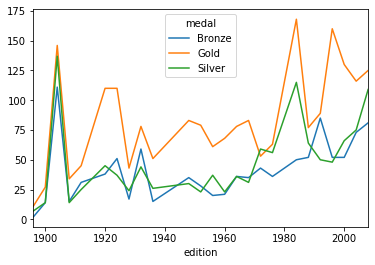

In [130]:
usa_medals_by_year.plot()
plt.show()

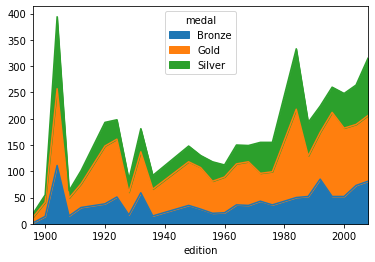

In [131]:
usa_medals_by_year.plot.area()
plt.show()

In [15]:
users = pd.read_csv("./datasets/users.csv")

In [16]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [19]:
df_joined = pd.concat([users, users.loc[0:2, :]], axis = 0).reset_index(drop=True)
df_joined.loc[3,'city'] = np.nan
df_joined.loc[6,'weekday'] = 'Tue'
df_joined

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,NaN,456,5
4,Sun,Austin,139,7
5,Sun,Dallas,237,12
6,Tue,Austin,326,3


In [20]:
df_joined['city'].value_counts()

Austin    4
Dallas    2
Name: city, dtype: int64